In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.signal import butter, filtfilt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import math
from scipy.fft import fft
from scipy.integrate import cumulative_trapezoid as cumtrapz
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter

In [14]:
rcar = pd.read_csv('../P4/IMU/shots/Vicon/Actual_P4_01.csv')
print(rcar)

               X            Y            Z      time
0    -956.595642  4138.782227  1046.005859  0.000000
1    -957.950195  4138.534668  1048.374634  0.008333
2    -958.924988  4138.032227  1050.314819  0.016667
3    -959.946411  4137.620117  1052.264404  0.025000
4    -960.885071  4137.353027  1053.942749  0.033333
...          ...          ...          ...       ...
998  -364.087799  1551.262573   863.862915  8.316667
999  -360.573151  1575.396362   866.520203  8.325000
1000 -357.478058  1599.299072   869.561890  8.333333
1001 -355.050812  1623.163086   872.793823  8.341667
1002 -352.949188  1646.765137   876.320496  8.350000

[1003 rows x 4 columns]


First 10 changes in gradient for Shot1.csv (excluding the first 50 points):
Time: 5.47 s, Acceleration Z: 0.15, Change in Gradient: -17.30
Time: 5.48 s, Acceleration Z: -0.18, Change in Gradient: 31.00
Time: 5.49 s, Acceleration Z: 0.27, Change in Gradient: -37.53
Time: 5.50 s, Acceleration Z: -0.68, Change in Gradient: -12.40
Time: 5.51 s, Acceleration Z: -0.43, Change in Gradient: 71.90
Time: 5.52 s, Acceleration Z: -0.19, Change in Gradient: 10.52
Time: 5.53 s, Acceleration Z: 0.23, Change in Gradient: -17.85
Time: 5.53 s, Acceleration Z: 0.18, Change in Gradient: -23.58
Time: 6.07 s, Acceleration Z: 3.14, Change in Gradient: 12.30
Time: 6.08 s, Acceleration Z: 3.27, Change in Gradient: -10.19

Absolute maximum change in gradient: 71.90 at Time: 5.51 s



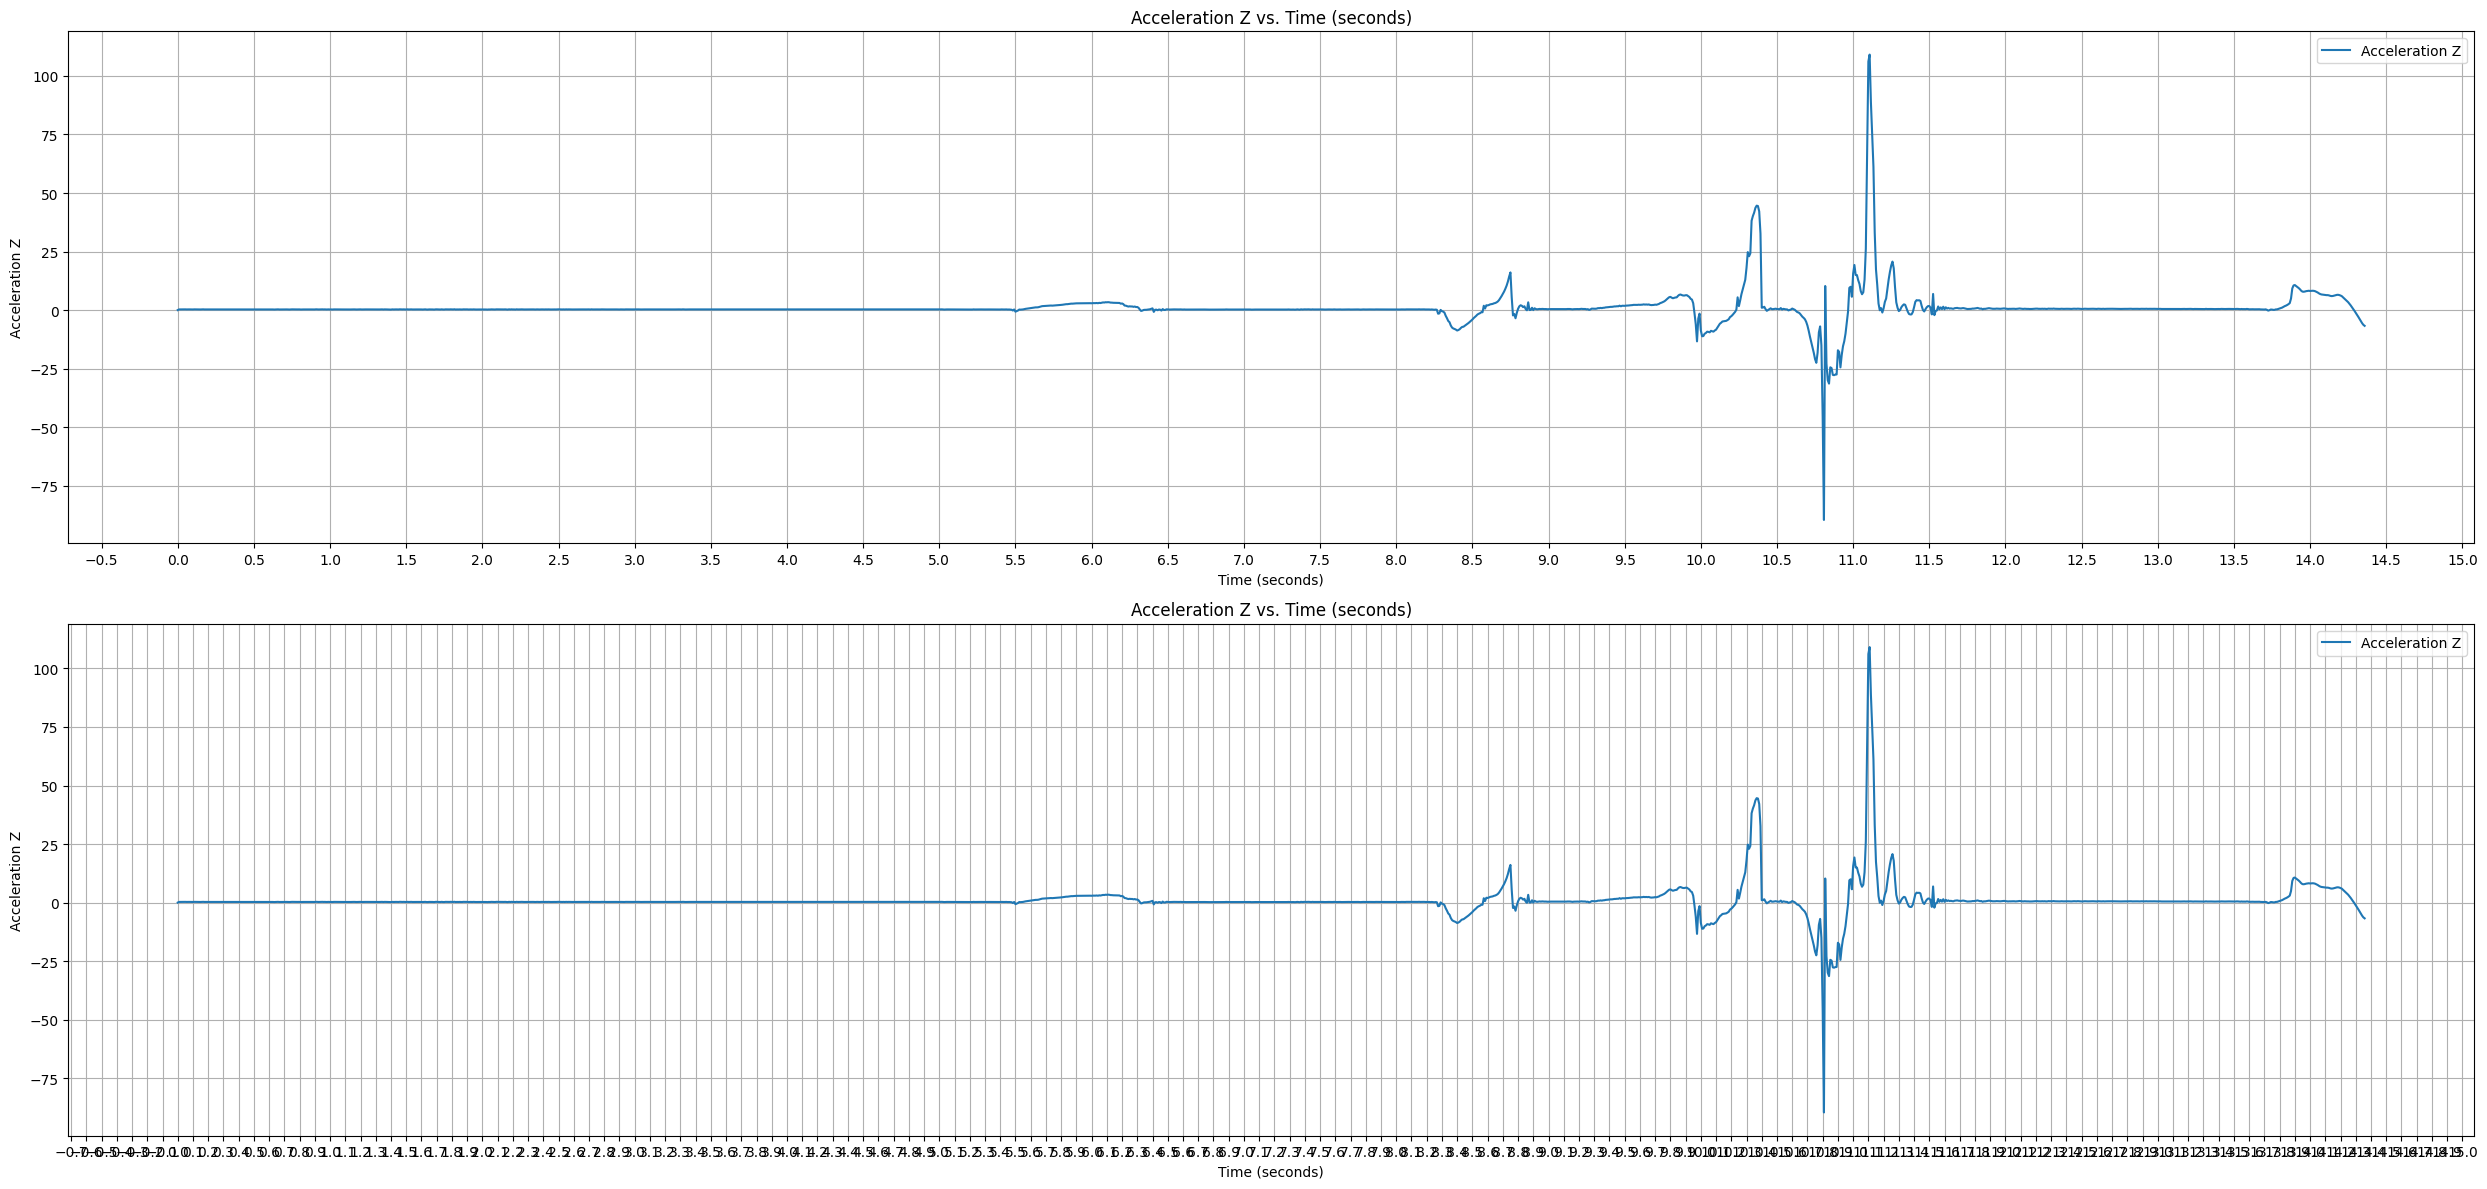

First 10 changes in gradient for Shot2.csv (excluding the first 50 points):
Time: 4.47 s, Acceleration Z: 0.19, Change in Gradient: 10.28
Time: 5.62 s, Acceleration Z: 0.03, Change in Gradient: 12.68
Time: 5.64 s, Acceleration Z: 0.10, Change in Gradient: -40.80
Time: 5.66 s, Acceleration Z: -0.35, Change in Gradient: 35.56
Time: 5.67 s, Acceleration Z: -0.27, Change in Gradient: 23.62
Time: 5.69 s, Acceleration Z: 0.13, Change in Gradient: -30.45
Time: 5.70 s, Acceleration Z: 0.08, Change in Gradient: 13.04
Time: 5.90 s, Acceleration Z: 2.53, Change in Gradient: 10.98
Time: 6.33 s, Acceleration Z: 2.90, Change in Gradient: -16.06
Time: 6.34 s, Acceleration Z: 2.55, Change in Gradient: 11.05

Absolute maximum change in gradient: -40.80 at Time: 5.64 s



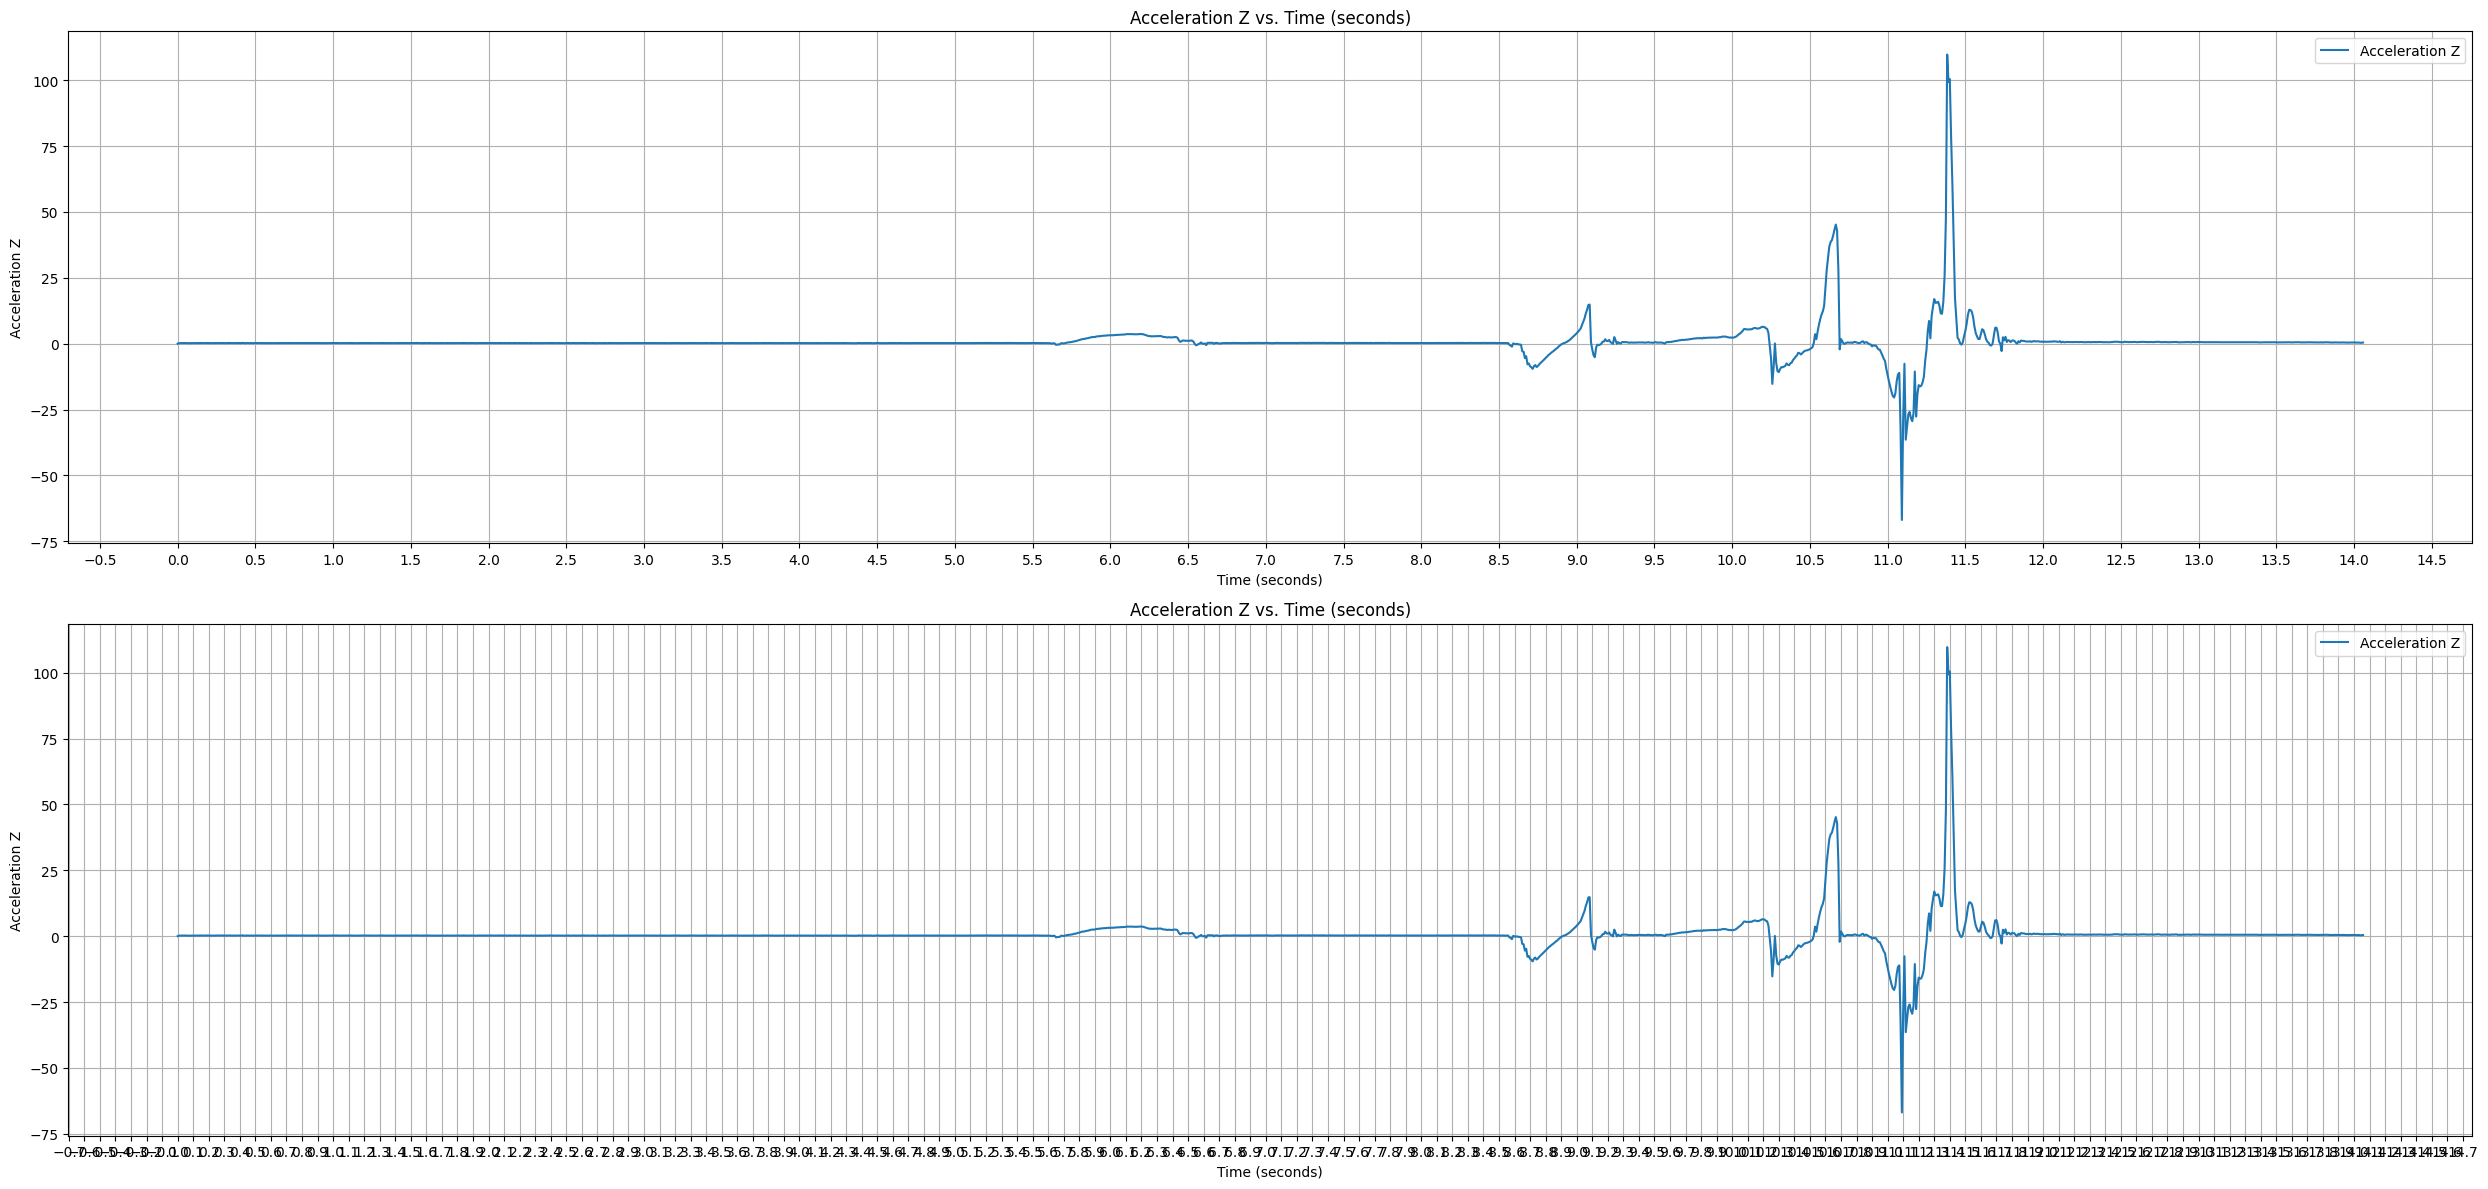

First 10 changes in gradient for Shot3.csv (excluding the first 50 points):
Time: 0.88 s, Acceleration Z: 0.16, Change in Gradient: 12.35
Time: 4.32 s, Acceleration Z: 0.12, Change in Gradient: 14.13
Time: 4.35 s, Acceleration Z: 0.27, Change in Gradient: -12.13
Time: 4.37 s, Acceleration Z: 0.23, Change in Gradient: -10.03
Time: 4.38 s, Acceleration Z: -0.12, Change in Gradient: -21.48
Time: 4.38 s, Acceleration Z: -0.33, Change in Gradient: -44.24
Time: 4.39 s, Acceleration Z: -1.42, Change in Gradient: 68.66
Time: 4.40 s, Acceleration Z: -0.49, Change in Gradient: 116.53
Time: 4.41 s, Acceleration Z: 0.36, Change in Gradient: -65.83
Time: 4.42 s, Acceleration Z: 0.20, Change in Gradient: -61.00

Absolute maximum change in gradient: 116.53 at Time: 4.40 s



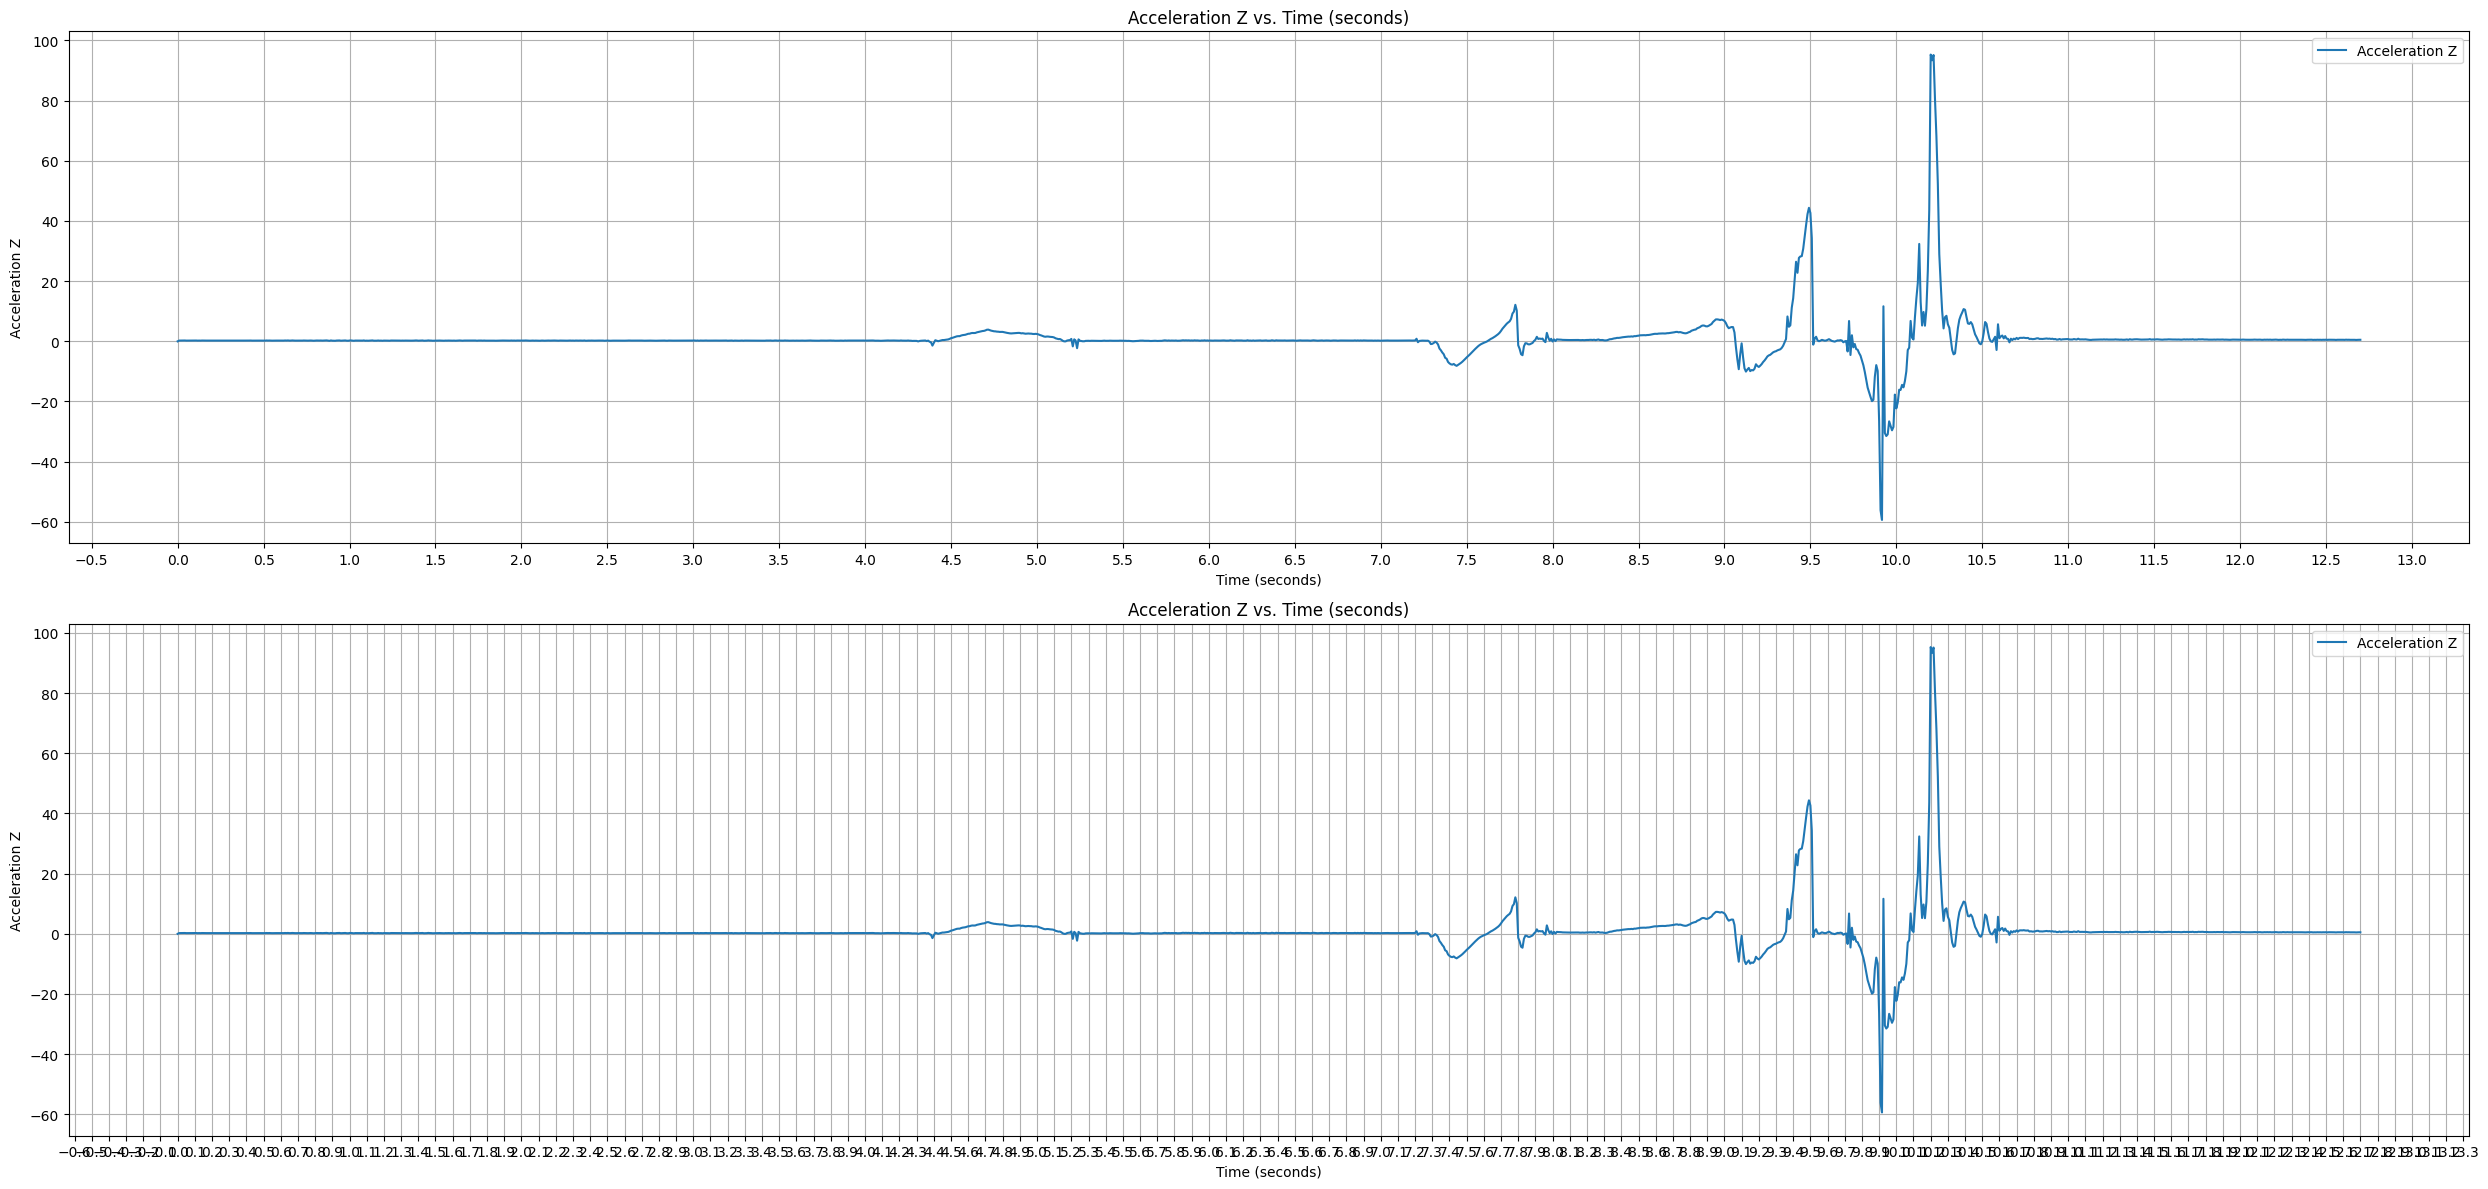

First 10 changes in gradient for Shot4.csv (excluding the first 50 points):
Time: 3.95 s, Acceleration Z: -0.08, Change in Gradient: -23.62
Time: 3.96 s, Acceleration Z: -0.49, Change in Gradient: 18.05
Time: 3.97 s, Acceleration Z: -0.35, Change in Gradient: 31.19
Time: 3.98 s, Acceleration Z: -0.23, Change in Gradient: -26.81
Time: 3.98 s, Acceleration Z: -0.55, Change in Gradient: 34.53
Time: 3.99 s, Acceleration Z: 0.15, Change in Gradient: 19.18
Time: 4.00 s, Acceleration Z: 0.15, Change in Gradient: -41.32
Time: 4.15 s, Acceleration Z: 2.39, Change in Gradient: -27.08
Time: 4.17 s, Acceleration Z: 2.43, Change in Gradient: 14.22
Time: 4.18 s, Acceleration Z: 2.65, Change in Gradient: 16.37

Absolute maximum change in gradient: -41.32 at Time: 4.00 s



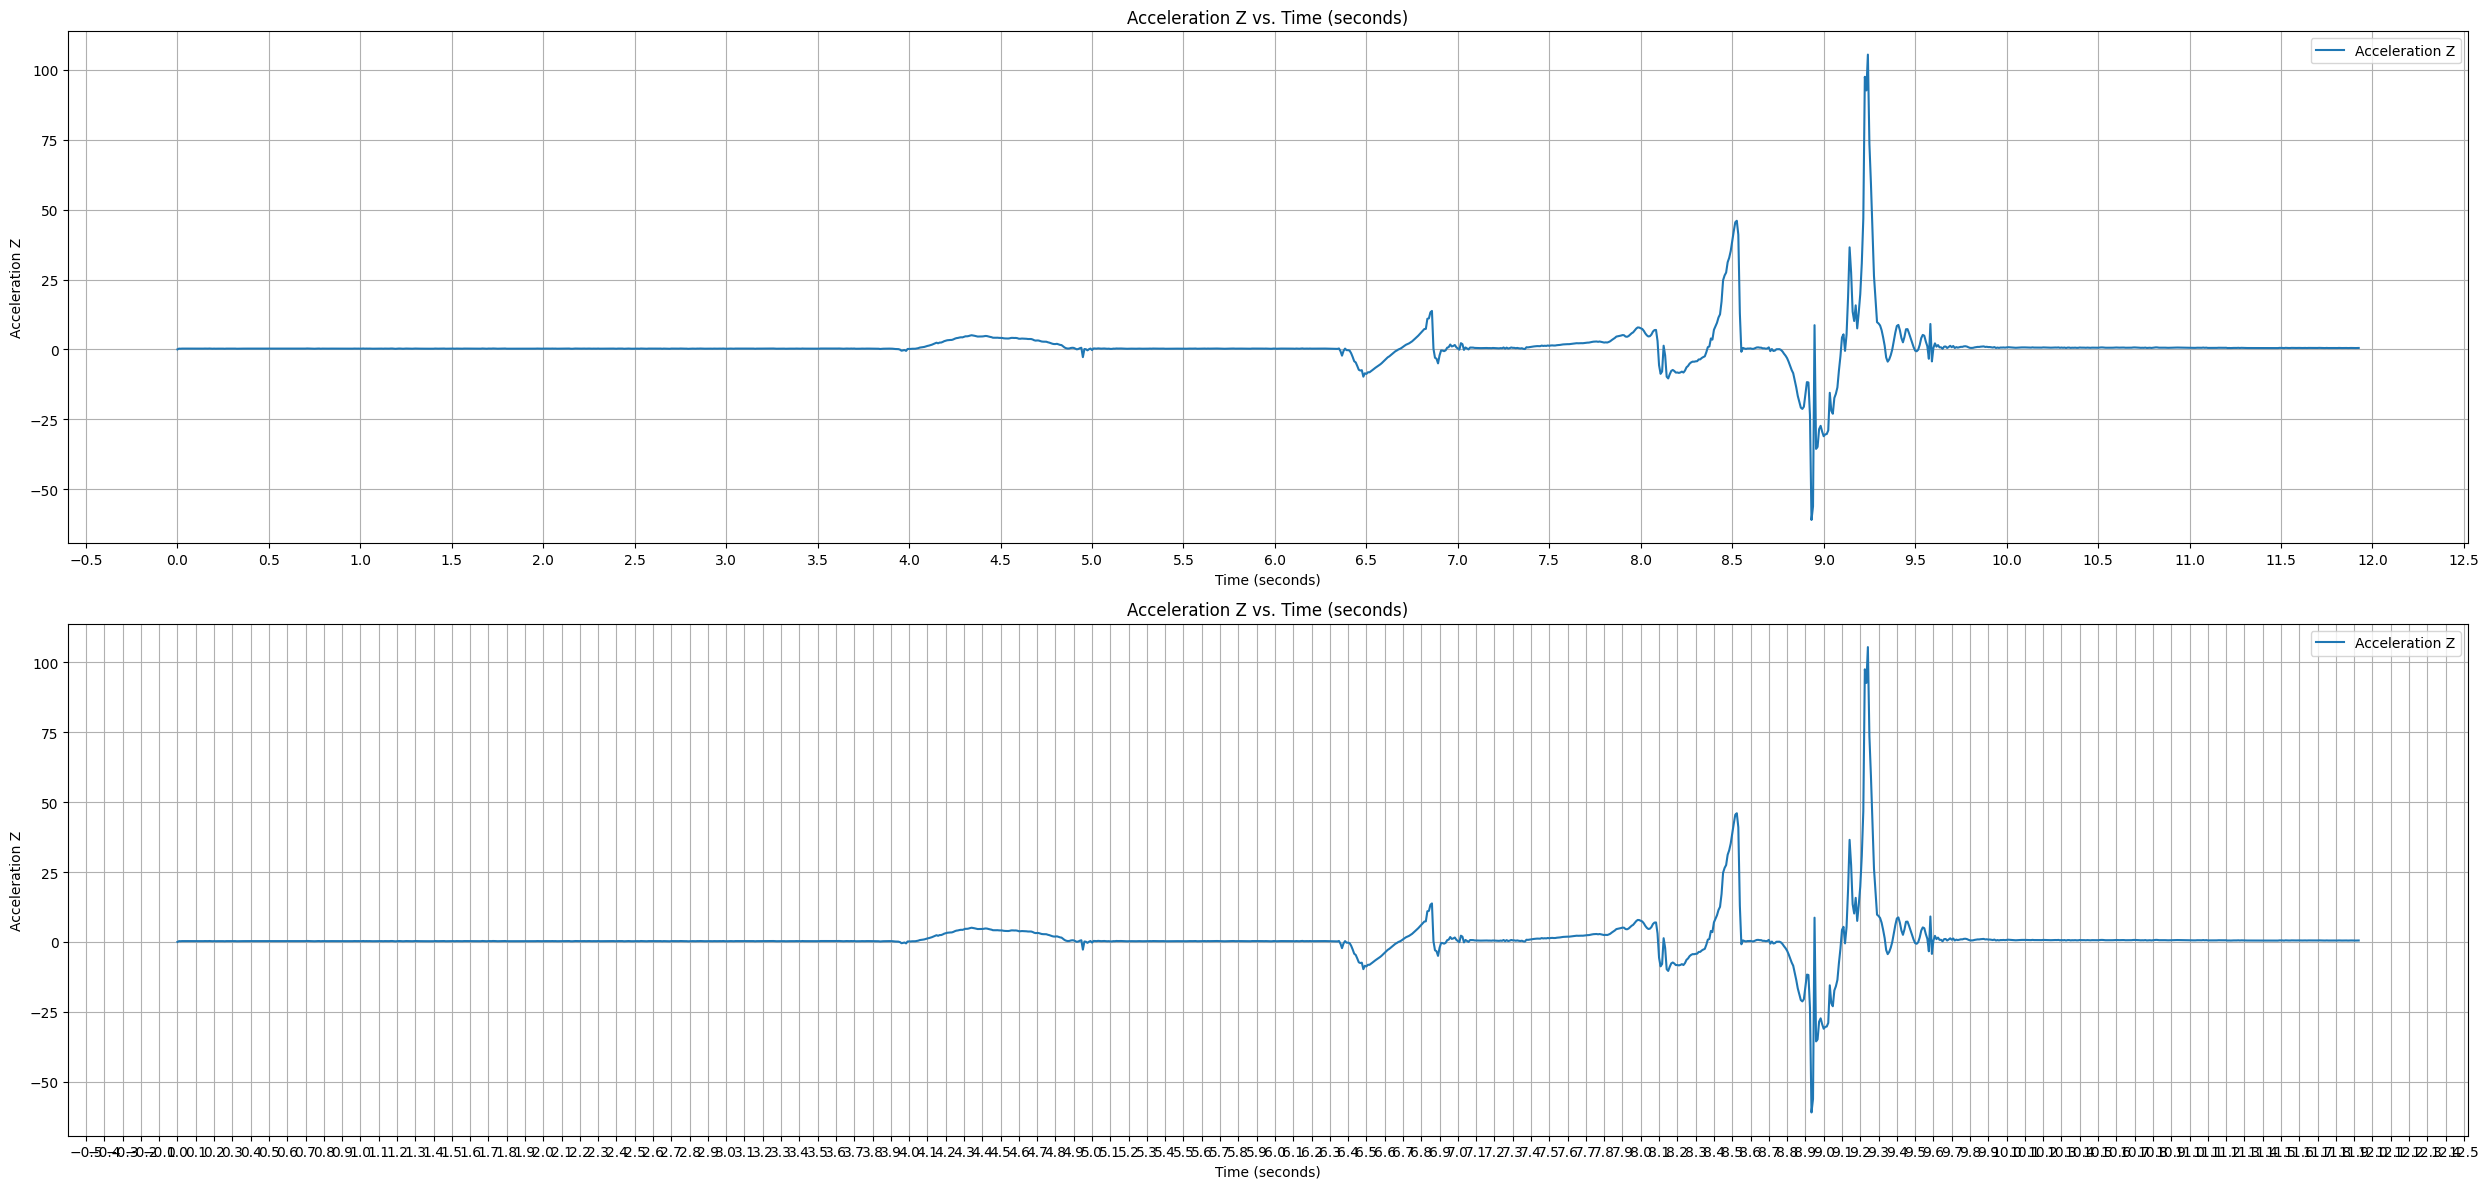

      PacketCounter  SampleTimeFine   Euler_X    Euler_Y     Euler_Z  \
0                 0      2936795545  0.677420 -87.953209 -168.338425   
1                 1      2936803878  0.729427 -87.952835 -168.386215   
2                 2      2936812211  0.722955 -87.953491 -168.376251   
3                 3      2936820544  0.736462 -87.954269 -168.385742   
4                 4      2936828877  0.680547 -87.955605 -168.325867   
...             ...             ...       ...        ...         ...   
6364           1427      3089331110  2.217792 -86.962173 -100.578201   
6365           1428      3089339443  2.584877 -86.970108 -100.938133   
6366           1429      3089347776  2.976781 -86.979492 -101.321747   
6367           1430      3089356109  3.415877 -86.987343 -101.752144   
6368           1431      3089364442  3.903579 -86.997238 -102.230316   

         Acc_X     Acc_Y     Acc_Z     Gyr_X     Gyr_Y     Gyr_Z Unnamed: 11  \
0     0.000000  0.000000  0.000000  0.000000  0.000000 

In [15]:
import os
import pandas as pd
import numpy as np

# Define the folder containing the CSV files
folder_path = '../P4/IMU/shots/Foot_left'

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Initialize a list to store the times of maximum changes in gradient
max_time_changes = []

# Loop through each CSV file
for csv_file in csv_files:
    # Read the CSV file
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    
    # Append the time_seconds column
    df['time_seconds'] = df.index * (1/120)
    
    # Calculate the Acc_Z_derivative column
    df['Acc_Z_derivative'] = np.gradient(df['Acc_Z'], df['time_seconds'])
    
    # Calculate the change_in_gradient column
    df['change_in_gradient'] = np.diff(df['Acc_Z_derivative'], prepend=df['Acc_Z_derivative'][0])
    
    # Set the threshold and skip points
    threshold = 10
    skip_points = 50
    
    # Create a mask for significant changes in gradient
    mask = np.abs(df['change_in_gradient']) > threshold
    adjusted_mask = np.zeros_like(mask, dtype=bool)
    adjusted_mask[skip_points:] = mask[skip_points:]
    
    # Extract the relevant data points
    time_seconds_high_change = df['time_seconds'][adjusted_mask]
    acc_z_high_change = df['Acc_Z'][adjusted_mask]
    change_in_gradient_high_change = df['change_in_gradient'][adjusted_mask]
    
    # Get the first 10 changes in gradient
    first_10_count = 10
    time_seconds_first_10 = time_seconds_high_change.head(first_10_count)
    acc_z_first_10 = acc_z_high_change.head(first_10_count)
    change_in_gradient_first_10 = change_in_gradient_high_change.head(first_10_count)
    
    # Find the maximum change in gradient among the first 10
    max_change_index = change_in_gradient_first_10.abs().idxmax()
    max_time = time_seconds_first_10.loc[max_change_index]
    max_change = change_in_gradient_first_10.loc[max_change_index]
    
    # Print the results
    print(f"First 10 changes in gradient for {csv_file} (excluding the first 50 points):")
    for t, acc, change in zip(time_seconds_first_10, acc_z_first_10, change_in_gradient_first_10):
        print(f"Time: {t:.2f} s, Acceleration Z: {acc:.2f}, Change in Gradient: {change:.2f}")
    
    print(f"\nAbsolute maximum change in gradient: {max_change:.2f} at Time: {max_time:.2f} s\n")
    
    # Store the time of the maximum change
    max_time_changes.append(max_time)
    
    # Plot the data before combining
    fig, axs = plt.subplots(2, 1, figsize=(25, 12))

    # Plotting on the first subplot
    axs[0].plot(df['time_seconds'], df['Acc_Z'], label='Acceleration Z')
    axs[0].set_xlabel('Time (seconds)')
    axs[0].set_ylabel('Acceleration Z')
    axs[0].set_title('Acceleration Z vs. Time (seconds)')
    axs[0].xaxis.set_major_locator(ticker.MultipleLocator(0.5))
    axs[0].xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    axs[0].legend()
    axs[0].grid(True)

    # Setting up the second subplot with specific x-axis locators
    axs[1].plot(df['time_seconds'], df['Acc_Z'], label='Acceleration Z')
    axs[1].set_xlabel('Time (seconds)')
    axs[1].set_ylabel('Acceleration Z')
    axs[1].set_title('Acceleration Z vs. Time (seconds)')
    axs[1].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    axs[1].xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()
    
    # Append the current DataFrame to the combined DataFrame
    combined_data = pd.concat([combined_data, df], ignore_index=True)

# Print the combined DataFrame
print(combined_data)

# Print the list of maximum time changes
print("List of times with maximum changes in gradient for each file:")
print(max_time_changes)

In [16]:
def euler_to_rotation_matrix(roll, pitch, yaw):
    roll, pitch, yaw = np.radians([roll, pitch, yaw])
    
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(roll), -np.sin(roll)],
        [0, np.sin(roll), np.cos(roll)]
    ])

    Ry = np.array([
        [np.cos(pitch), 0, np.sin(pitch)],
        [0, 1, 0],
        [-np.sin(pitch), 0, np.cos(pitch)]
    ])

    Rz = np.array([
        [np.cos(yaw), -np.sin(yaw), 0],
        [np.sin(yaw), np.cos(yaw), 0],
        [0, 0, 1]
    ])

    R = Rz @ Ry @ Rx
    return R
def gravity_vector_in_sensor_frame(roll, pitch, yaw):
    g = 9.81 
    g_global = np.array([0, 0, -g])
    R = euler_to_rotation_matrix(roll, pitch, yaw)
    g_sensor = R.T @ g_global  
    return g_sensor
def convert_and_correct_acceleration(acc_x, acc_y, acc_z, roll, pitch, yaw):
    R = euler_to_rotation_matrix(roll, pitch, yaw)
    g_sensor = gravity_vector_in_sensor_frame(roll, pitch, yaw)
    acceleration_sensor_frame = np.array([acc_x, acc_y, acc_z])
    acceleration_corrected = acceleration_sensor_frame - g_sensor
    acceleration_global = R @ acceleration_corrected
    return acceleration_global


def apply_conversion(row):
    acc_x, acc_y, acc_z = row['Acc_X'], row['Acc_Y'], row['Acc_Z']
    roll, pitch, yaw = row['Euler_X'], row['Euler_Y'], row['Euler_Z']
    return pd.Series(convert_and_correct_acceleration(acc_x, acc_y, acc_z, roll, pitch, yaw),
                     index=['Acc_Global_X', 'Acc_Global_Y', 'Acc_Global_Z'])


In [17]:
def highpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = lfilter(b, a, data)
    return y

In [18]:
arm_folder_path = '../P4/IMU/shots/Arm'

arm_csv_files = [file for file in os.listdir(arm_folder_path) if file.endswith('.csv')]
# Define the rolling window size
window_size = 5
# Iterate through each arm CSV file and process it
for csv_file, max_time in zip(arm_csv_files, max_time_changes):
    # Read the CSV file
    file_path = os.path.join(arm_folder_path, csv_file)
    df = pd.read_csv(file_path)
    
    # Calculate the time_seconds column
    df['time_seconds'] = df.index * (1/120)
    
    # Filter out data points with time_seconds less than max_time
    df_filtered = df[df['time_seconds'] >= max_time]
    
    # Reset the index and recalculate time_seconds
    df_filtered = df_filtered.reset_index(drop=True)
    df_filtered['time_seconds'] = df_filtered.index * (1/120)
    
    # Remove unnamed columns and specific columns if present
    df_filtered = df_filtered.loc[:, ~df_filtered.columns.str.contains('^Unnamed')]
    df_filtered = df_filtered.drop(columns=['PacketCounter', 'SampleTimeFine'], errors='ignore') 


    fs = 120
    cutoff = 0.1  # Example cutoff frequency for high-pass filter
    zupt_df_filtered = zero_velocity_update_single_axis(df_filtered['filtered_accel_z'].values, df_filteredt['Gyr_Z'].values, acc_threshold, gyro_threshold, window_size)
    df_filtered['Stationary'] = zupt_df_filtered
    # Apply high-pass filter
    df_filtered['filtered_accel_x'] = highpass_filter(df_filtered['Acc_X'], cutoff, fs)
    df_filtered['filtered_accel_y'] = highpass_filter(df_filtered['Acc_Y'], cutoff, fs)
    df_filtered['filtered_accel_z'] = highpass_filter(df_filtered['Acc_Z'], cutoff, fs)

    # Initialize velocity and displacement arrays
    velocity_x = [0]
    velocity_y = [0]
    velocity_z = [0]
    displacement_x = [0]
    displacement_y = [0]
    displacement_z = [0]

    dt = 1 / fs

    # Iterate over the DataFrame to compute velocities and displacements
    for i in range(1, len(df_filtered)):
        if df_filtered.loc[i, 'Stationary']:
            velocity_x.append(velocity_x[-1] + df_filtered['filtered_accel_x'][i] * dt)
            velocity_y.append(velocity_y[-1] + df_filtered['filtered_accel_y'][i] * dt)
            velocity_z.append(velocity_z[-1] + df_filtered['filtered_accel_z'][i] * dt)
        else:
            velocity_x.append(0)
            velocity_y.append(0)
            velocity_z.append(0)

        displacement_x.append(displacement_x[-1] + velocity_x[i] * dt)
        displacement_y.append(displacement_y[-1] + velocity_y[i] * dt)
        displacement_z.append(displacement_z[-1] + velocity_z[i] * dt)

    # Add the computed values to the DataFrame
    df_filtered['Vel_X'] = velocity_x
    df_filtered['Vel_Y'] = velocity_y
    df_filtered['Vel_Z'] = velocity_z
    df_filtered['Displacement_X'] = displacement_x
    df_filtered['Displacement_Y'] = displacement_y
    df_filtered['Displacement_Z'] = displacement_z






    df_filtered[['Acc_Global_X', 'Acc_Global_Y', 'Acc_Global_Z']] = df_filtered.apply(apply_conversion, axis=1)
    # Add rolling window statistics
    df_filtered['Acc_Global_X_Roll_Mean'] = df_filtered['Acc_Global_X'].rolling(window=window_size).mean()
    df_filtered['Acc_Global_Y_Roll_Mean'] = df_filtered['Acc_Global_Y'].rolling(window=window_size).mean()
    df_filtered['Acc_Global_Z_Roll_Mean'] = df_filtered['Acc_Global_Z'].rolling(window=window_size).mean()
    
    df_filtered['Vel_X_Roll_Mean'] = df_filtered['Vel_X'].rolling(window=window_size).mean()
    df_filtered['Vel_Y_Roll_Mean'] = df_filtered['Vel_Y'].rolling(window=window_size).mean()
    df_filtered['Vel_Z_Roll_Mean'] = df_filtered['Vel_Z'].rolling(window=window_size).mean()
    
    df_filtered['Acc_Global_X_Roll_Std'] = df_filtered['Acc_Global_X'].rolling(window=window_size).std()
    df_filtered['Acc_Global_Y_Roll_Std'] = df_filtered['Acc_Global_Y'].rolling(window=window_size).std()
    df_filtered['Acc_Global_Z_Roll_Std'] = df_filtered['Acc_Global_Z'].rolling(window=window_size).std()
    
    df_filtered['Vel_X_Roll_Std'] = df_filtered['Vel_X'].rolling(window=window_size).std()
    df_filtered['Vel_Y_Roll_Std'] = df_filtered['Vel_Y'].rolling(window=window_size).std()
    df_filtered['Vel_Z_Roll_Std'] = df_filtered['Vel_Z'].rolling(window=window_size).std()
    
    df_filtered['Acc_Global_X_Roll_Sum'] = df_filtered['Acc_Global_X'].rolling(window=window_size).sum()
    df_filtered['Acc_Global_Y_Roll_Sum'] = df_filtered['Acc_Global_Y'].rolling(window=window_size).sum()
    df_filtered['Acc_Global_Z_Roll_Sum'] = df_filtered['Acc_Global_Z'].rolling(window=window_size).sum()
    
    df_filtered['Vel_X_Roll_Sum'] = df_filtered['Vel_X'].rolling(window=window_size).sum()
    df_filtered['Vel_Y_Roll_Sum'] = df_filtered['Vel_Y'].rolling(window=window_size).sum()
    df_filtered['Vel_Z_Roll_Sum'] = df_filtered['Vel_Z'].rolling(window=window_size).sum()
    
    df_filtered['Acc_Global_X_Roll_Max'] = df_filtered['Acc_Global_X'].rolling(window=window_size).max()
    df_filtered['Acc_Global_Y_Roll_Max'] = df_filtered['Acc_Global_Y'].rolling(window=window_size).max()
    df_filtered['Acc_Global_Z_Roll_Max'] = df_filtered['Acc_Global_Z'].rolling(window=window_size).max()
    
    df_filtered['Vel_X_Roll_Max'] = df_filtered['Vel_X'].rolling(window=window_size).max()
    df_filtered['Vel_Y_Roll_Max'] = df_filtered['Vel_Y'].rolling(window=window_size).max()
    df_filtered['Vel_Z_Roll_Max'] = df_filtered['Vel_Z'].rolling(window=window_size).max()
    
    df_filtered['Acc_Global_X_Roll_Min'] = df_filtered['Acc_Global_X'].rolling(window=window_size).min()
    df_filtered['Acc_Global_Y_Roll_Min'] = df_filtered['Acc_Global_Y'].rolling(window=window_size).min()
    df_filtered['Acc_Global_Z_Roll_Min'] = df_filtered['Acc_Global_Z'].rolling(window=window_size).min()
    
    df_filtered['Vel_X_Roll_Min'] = df_filtered['Vel_X'].rolling(window=window_size).min()
    df_filtered['Vel_Y_Roll_Min'] = df_filtered['Vel_Y'].rolling(window=window_size).min()
    df_filtered['Vel_Z_Roll_Min'] = df_filtered['Vel_Z'].rolling(window=window_size).min()
    
    df_filtered['Acc_Global_X_Magnitude'] = (df_filtered['Acc_Global_X']**2 + df_filtered['Acc_Global_Y']**2 + df_filtered['Acc_Global_Z']**2)**0.5
    df_filtered['Vel_X_Magnitude'] = (df_filtered['Vel_X']**2 + df_filtered['Vel_Y']**2 + df_filtered['Vel_Z']**2)**0.5
    # Save the filtered and feature-engineered DataFrame to a new CSV file
    filtered_file_path = os.path.join(arm_folder_path, f"filtered_{csv_file}")
    df_filtered.to_csv(filtered_file_path, index=False)
    
    print(f"Feature-engineered data for {csv_file} saved to {filtered_file_path}")

KeyError: 'Stationary'

In [ ]:
import os
import pandas as pd

# Define the mapping between Vicon files and arm files
vicon_to_arm_mapping = {
    'Actual_P4_01.csv': 'filtered_Shot1.csv',
    'Actual_P4_02.csv': 'filtered_Shot2.csv',
    'Actual_P4_03.csv': 'filtered_Shot3.csv',
    'Actual_P4_04.csv': 'filtered_Shot4.csv'
}

# Define the folder containing the Vicon CSV files
vicon_folder_path = '../P4/IMU/shots/Vicon'

# Initialize lists to store DataFrames
train_dfs = []
test_df = None

# Process each Vicon file
for i, (vicon_file, arm_file) in enumerate(vicon_to_arm_mapping.items()):
    # Define the file paths
    vicon_file_path = os.path.join(vicon_folder_path, vicon_file)
    arm_file_path = os.path.join(arm_folder_path, arm_file)
    
    # Check if the arm file exists
    if not os.path.isfile(arm_file_path):
        print(f"Arm file {arm_file} not found.")
        continue
    
    # Read the Vicon and arm files
    vicon_df = pd.read_csv(vicon_file_path)
    arm_df = pd.read_csv(arm_file_path)
    
    # Calculate the number of rows to drop from the end of whichever dataset is larger
    if len(vicon_df) > len(arm_df):
        rows_to_drop = len(vicon_df) - len(arm_df)
        vicon_df = vicon_df.iloc[:-rows_to_drop].reset_index(drop=True)
    elif len(arm_df) > len(vicon_df):
        rows_to_drop = len(arm_df) - len(vicon_df)
        arm_df = arm_df.iloc[:-rows_to_drop].reset_index(drop=True)
    
    # Align the Vicon data with the arm data
    combined_df = pd.concat([arm_df, vicon_df], axis=1)
    
    # Remove unnamed columns if present
    combined_df = combined_df.loc[:, ~combined_df.columns.str.contains('^Unnamed')]
    
    # Drop the 'time' column if it exists
    if 'time' in combined_df.columns:
        combined_df = combined_df.drop(columns=['time'])
    
    # Append to training data or set as test data
    if i < len(vicon_to_arm_mapping) - 1:
        train_dfs.append(combined_df)
    else:
        test_df = combined_df
    
    print(f"Processed {arm_file} and appended Vicon data")
# Combine all training DataFrames
# if train_dfs:
#     train = pd.concat(train_dfs, ignore_index=True)
#     # Save the training set
#     train_path = os.path.join(arm_folder_path, 'train.csv')
#     train.to_csv(train_path, index=False)
#     print(f"Training data saved to {train_path}")

# # Save the test set
# if test_df is not None:
#     test_path = os.path.join(arm_folder_path, 'test.csv')
#     test_df.to_csv(test_path, index=False)
#     print(f"Test data saved to {test_path}")

# print("All files have been processed and combined.")

    if i == 0:  # First file is used for training
        train_df = combined_df
    elif i == 1:  # Second file is used for testing
        test_df = combined_df
    else:
            # Optionally, you can handle more files or log them
        print(f"Skipping file {arm_file} as it's not used for training or testing.")
        
    print(f"Processed {arm_file} and appended Vicon data")

# Print results
if train_df is not None:
    print("Training data:")
    print(train_df.head())
else:
    print("No training data available.")

if test_df is not None:
    print("Testing data:")
    print(test_df.head())
else:
    print("No testing data available.")


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume X_train and X_test are the DataFrames from the feature engineering steps
# Combine the training and test sets for plotting
combined_df = pd.concat([train_df], ignore_index=True)
print(f'Train = {train_df}')
print(f'test = {test_df}')
# Calculate the correlation matrix
corr_matrix = combined_df.corr()

# Identify the column named 'Z'
Z_column = 'Z'



# Check if 'Z' column exists in the DataFrame
if Z_column not in corr_matrix.columns:
    print(f"Column '{Z_column}' does not exist in the DataFrame.")
else:
    # Extract correlations with 'Z' column
    Z_corr = corr_matrix[[Z_column]]
    
    # Plot the correlation matrix with 'Z' column
    plt.figure(figsize=(10, 8))
    sns.heatmap(Z_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
    plt.title(f'Correlation Matrix for Column {Z_column}')
    plt.show()

    # Extract and print correlations greater than 0.25
    high_corr_Z = Z_corr.abs() > 0.15  # Exclude self-correlation (which is 1)
    high_corr_Z_pairs = [(i, Z_corr.loc[i, Z_column]) for i in high_corr_Z.index if high_corr_Z.loc[i, Z_column]]
    i_list = []
    # Print list of correlations greater than 0.25 with 'Z' column
    print(f"Correlations with column '{Z_column}' greater than 0.15:")
    for i, corr in high_corr_Z_pairs:
        i_list.append(i)
        print(i_list)
        print(f"Correlation between {i} and {Z_column}: {corr:.2f}")


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Print the DataFrames
print(f'train={train_df}')
print(f'test = {test_df}')

# Define the feature and target DataFrames
X_train = train_df[['Euler_X', 'Acc_X', 'Gyr_X', 'Gyr_Y', 'time_seconds', 'Vel_X', 'Vel_Y', 'Vel_Z', 'Vel_X_Roll_Mean', 'Vel_Y_Roll_Mean', 'Vel_Z_Roll_Mean', 'Vel_X_Roll_Std', 'Vel_X_Roll_Sum', 'Vel_Y_Roll_Sum', 'Vel_Z_Roll_Sum', 'Vel_X_Roll_Max', 'Vel_Y_Roll_Max', 'Vel_Z_Roll_Max', 'Vel_X_Roll_Min', 'Vel_Y_Roll_Min', 'Vel_Z_Roll_Min', 'Vel_X_Magnitude']]
y_train = train_df['Z']

X_test = test_df[['Euler_X', 'Acc_X', 'Gyr_X', 'Gyr_Y', 'time_seconds', 'Vel_X', 'Vel_Y', 'Vel_Z', 'Vel_X_Roll_Mean', 'Vel_Y_Roll_Mean', 'Vel_Z_Roll_Mean', 'Vel_X_Roll_Std', 'Vel_X_Roll_Sum', 'Vel_Y_Roll_Sum', 'Vel_Z_Roll_Sum', 'Vel_X_Roll_Max', 'Vel_Y_Roll_Max', 'Vel_Z_Roll_Max', 'Vel_X_Roll_Min', 'Vel_Y_Roll_Min', 'Vel_Z_Roll_Min', 'Vel_X_Magnitude']]
y_test = test_df['Z']
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)
# Print the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print shapes of scaled features to confirm
print(f"Scaled training features shape: {X_train_scaled.shape}")
print(f"Scaled testing features shape: {X_test_scaled.shape}")

# Optionally, convert the scaled features back to DataFrames for ease of use
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print the first few rows of scaled data to verify
print(f"First few rows of scaled training features:\n{X_train_scaled_df.head()}")
print(f"First few rows of scaled testing features:\n{X_test_scaled_df.head()}")


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have X_train, y_train, X_test, and y_test from previous steps
# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)  # Use X_train_scaled if standardized, otherwise use X_train

# Predict on the test set
y_pred = rf_regressor.predict(X_test_scaled)  # Use X_test_scaled if standardized, otherwise use X_test

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Optionally, print some predictions vs actual values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(f"First few rows of actual vs predicted values:\n{results_df.head()}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

# Prepare data for plotting
plot_data = pd.DataFrame({
    'time_seconds': X_test['time_seconds'].values,
    'Actual Rcar_Z': y_test.values,
    'Predicted Rcar_Z': y_pred
})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(plot_data['time_seconds'], plot_data['Actual Rcar_Z'], label='Actual Rcar_Z', color='red', marker='o', linestyle='--')
plt.plot(plot_data['time_seconds'], plot_data['Predicted Rcar_Z'], label='Predicted Rcar_Z', color='blue', marker='o', linestyle='-')
plt.xlabel('Time in Seconds')
plt.ylabel('Rcar_Z')
plt.title('Actual vs Predicted Rcar_Z')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
def create_sequences(X, y, window_size):
    Xs, ys = [], []
    for i in range(window_size, len(X)): 
        Xs.append(X.iloc[i-window_size:i].values)
        ys.append(y.iloc[i])
    return np.array(Xs), np.array(ys)

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
window_size = 5
X_train_seq, y_train_seq = create_sequences(X_train_scaled_df, y_train, window_size)
X_test_seq, y_test_seq = create_sequences(X_test_scaled_df, y_test, window_size)
X_train_seq = np.array(X_train_seq, dtype=np.float32)
y_train_seq = np.array(y_train_seq, dtype=np.float32)
X_test_seq = np.array(X_test_seq, dtype=np.float32)
y_test_seq = np.array(y_test_seq, dtype=np.float32)
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_seq = scaler_X.fit_transform(X_train_seq.reshape(-1, X_train_seq.shape[-1])).reshape(X_train_seq.shape)
X_test_seq = scaler_X.transform(X_test_seq.reshape(-1, X_test_seq.shape[-1])).reshape(X_test_seq.shape)
y_train_seq = scaler_y.fit_transform(y_train_seq.reshape(-1, 1)).reshape(-1)
y_test_seq = scaler_y.transform(y_test_seq.reshape(-1, 1)).reshape(-1)


def build_model(architecture='basic'):
    model = Sequential()
    if architecture == 'basic':
        model.add(LSTM(35, input_shape=(window_size, X_train_seq.shape[2]), kernel_regularizer=l2(0.2)))
    elif architecture == 'bidirectional':
        model.add(Bidirectional(LSTM(50, return_sequences=True, kernel_regularizer=l2(0.5)), input_shape=(window_size, X_train_seq.shape[2])))
        model.add(Dropout(0.1))
        model.add(LSTM(32, kernel_regularizer=l2(0.5)))
    elif architecture == 'bidirectional_dropout':
        model.add(Bidirectional(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.5)), input_shape=(window_size, X_train_seq.shape[2])))
        model.add(Dropout(0.7))
        model.add(LSTM(32, kernel_regularizer=l2(0.01)))
        model.add(Dropout(0.7))
    else:
        raise ValueError('Unknown architecture')
    
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


def evaluate_model(model):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    history = model.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)
    mse_test = model.evaluate(X_test_seq, y_test_seq, verbose=0)
    rmse_test = np.sqrt(mse_test)
    return rmse_test


architectures = ['basic', 'bidirectional', 'bidirectional_dropout']
results = {}

for arch in architectures:
    print(f"Training model with {arch} architecture...")
    model = build_model(architecture=arch)
    rmse_test = evaluate_model(model)
    results[arch] = rmse_test
    print(f"{arch} model RMSE: {rmse_test}")


best_architecture = min(results, key=results.get)
print(f"Best model architecture: {best_architecture} with RMSE: {results[best_architecture]}")

best_model = build_model(architecture=best_architecture)
best_model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)
y_pred_seq = best_model.predict(X_test_seq)


y_pred_seq = scaler_y.inverse_transform(y_pred_seq).reshape(-1)
y_test_seq = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1)).reshape(-1)

time_axis = np.arange(len(y_test_seq))
rmse_test_unscaled = np.sqrt(np.mean((y_test_seq - y_pred_seq) ** 2))
print(f'Test RMSE (unscaled): {rmse_test_unscaled}')

plt.figure(figsize=(12, 6))
plt.plot(time_axis, y_test_seq, label='Actual Values', color='blue')
plt.plot(time_axis, y_pred_seq, label='Predicted Values', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'Actual vs. Predicted Values ({best_architecture} model)')
plt.legend()
plt.show()


## Feature engineering to get more features
